In [1]:
import imp
import hydra.experimental
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
tf.enable_eager_execution()

import precog.esp_train as esp_train
import precog.utils.rand_util as randu
import precog.plotting.plot as plot

# import precog.dataset.trimodal_dataset as tri_dataset
# import precog.dataset.serialized_dataset as dill_dataset
# import precog.utils.tfutil as tfu
# import precog.utils.similarity_util as similarityu
%matplotlib inline

hydra.experimental.initialize(config_dir="../precog/conf/", strict=True)
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

/home/nrhinehart/pre3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nrhinehart/pre3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nrhinehart/pre3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nrhinehart/pre3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [2]:
rand_dir = randu.random_string(5)

os.mkdir(rand_dir)
os.chdir(rand_dir)

cfg=hydra.experimental.compose('esp_train_config.yaml')
#cfg=hydra.experimental.compose('dataset/trimodal_dataset.yaml', overrides=[cfg])

In [3]:
cfg.main.eager = True
opt=esp_train.prepare_for_optimization(cfg)

minibatch = opt.dataset.get_minibatch_with_replacement()
obj_return = opt.objective(opt.model_distribution, None, opt.data_distribution_proxy, minibatch) 
expert_rollout = obj_return.rollout

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


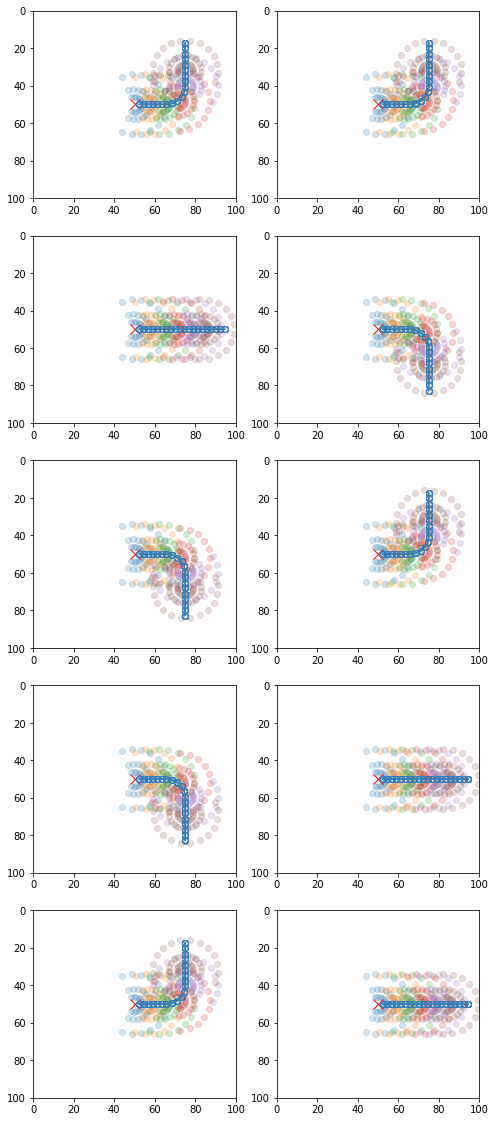

In [4]:
fig, axes = plot.get_figure()
plotwhisk = False
for b in range(10):
    _=plot.plot_rollout(expert_rollout, fig=fig, ax=axes.ravel()[b], b=b)
    axes.ravel()[b].plot(*expert_rollout.phi.original_local2grid.t[b,0].numpy().T, color='red', marker='x', markersize=10)
    for t in range(0,18,3):
        w = expert_rollout.metadata_list[t]['whiskers_grid'][b,0,0]
        wx,wy=w[:,0],w[:,1]
        axes.ravel()[b].scatter(wx,wy,alpha=0.2)